# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Donny Juhari
- Email: donnyjuhari@gmail.com
- Id Dicoding: donny_juhari

## Pertanyaan Bisnis

- Apakah kondisi cuaca mempengaruhi jumlah pemakaian Bike Sharing?
- Kapan pemakaian Sepeda paling banyak dipakai berdasarkan bulan kalender?
- Jenis pengguna manakah yang paling banyak memakai Bike Sharing di setiap musimnya?

## Library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

 Data untuk Bike Sharing berdasarkan data harian 


In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Proses pengumpulan data telah selesai, selanjutnya adalah proses penilaian data.

### Assessing Data

#Melihat komposisi data secara lebih mendalam untuk setiap file

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#Data harian memperlihatkan semua kolom memiliki baris yang sama, sehingga dapat disimpulkan tidak ada data null

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang hilang (missing value) untuk Data harian.Selanjutnya adalah pengecekan duplikasi data

In [5]:
print("Jumlah duplikasi untuk Data Harian: ", day_df.duplicated().sum())
day_df.describe(include="all")

Jumlah duplikasi untuk Data Harian:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

Tidak ada duplikasi data sehingga kode day_df.drop_duplicates(inplace=True) tidak perlu dijalankan. 
Secara keseluruhan data yang tersedia sudah bersih untuk dilakukan eksplorasi. 


## Exploratory Data Analysis (EDA)

### Pertama, kita melihat data di musim apakah yang memiliki rata-rata pemakaian terbanyak dan terendah? Data asli akan diubah sehingga menjadi lebih mudah dibaca
1. Kolom season : 1 untuk Spring (Musim Semi), 2 untuk Summer (Musim Panas), 3 untuk Autumn/Fall (Musim Gugur), 4 untuk Winter (Musim Dingin)
2. Kolom mnth (month) 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec 
3. Kolom weathersit 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
4. Kolom weekday 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [8]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,Misty,14.110847,0.363625,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,Misty,14.902598,0.353739,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,Clear,8.050924,0.189405,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,Clear,8.200000,0.212122,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,Clear,9.305237,0.229270,43.6957,12.522300,82,1518,1600


### Kedua, kita akan mengubah data temp, windspeed dan hum 
1. Temp dikali 41 karena data mentahnya dibagi dengan 41
2. Hum dikali 100 karena data mentahnya dibagi dengan 100
3. windspeed dikali 67 karena data mentahnya dibagi dengan 67

In [5]:
day_df['temp'] = day_df['temp'].apply(lambda x: x * 41)
day_df['hum'] = day_df['hum'].apply(lambda x: x * 100)
day_df['windspeed'] = day_df['windspeed'].apply(lambda x: x * 67)

In [6]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"], 
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"],
})

instant casual                               registered       \
       nunique    max  min         mean         std        max  min   
season                                                                
1          181   3155    9   334.928177  387.655561       5315  416   
2          184   3410  120  1106.097826  737.590829       6456  674   
3          188   3160  118  1202.611702  595.975032       6917  889   
4          178   3031    2   729.112360  606.318118       6946   20   

                                   cnt                                  
               mean          std   max   min         mean          std  
season                                                                  
1       2269.204420  1200.269751  7836   431  2604.132597  1399.942119  
2       3886.233696  1353.375628  8362   795  4992.331522  1695.977235  
3       4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
4       3999.050562  1444.782557  8555    22  4728.162921  1699.615261

## Beberapa poin menarik :
1. Pemakaian tertinggi untuk Bike Sharing adalah di Musim Gugur (Autumn/Fall) dan pemakaian terendah adalah di Musim Winter (Spring) untuk pemakai Casual dan Registered.
2. Pemakaian terbanyak Bike Sharing menurun di Musim Semi namun pemakaian minimum tercatat pada saat musim Dingin (Winter)
3. Pemakai Registered mendominasi Bike Sharing di semua musim dibandingkan dengan pemakai Casual

## Selanjutnya, kita melihat jumlah pengguna untuk kondisi cuaca. 
1. Temperature dicatat dalam Celcius (Nilai dikali 40 karena data aslinya telah dibagi dengan 40)
2. Humidity merupakan kelembaban udara (Nilai dikali 100 karena data aslinya telah dibagi dengan 100)
3. Wind Speed merupakan kecepatan angin (Nilai dikali 67 karena data aslinya telah dibagi dengan 67)

In [9]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"], 
    "windspeed": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"],
})

instant       temp                                  windspeed  \
       nunique        max        min       mean       std        max   
season                                                                 
Fall       188  35.328347  19.235847  28.958682  2.904749  25.166339   
Spring     181  23.472500   2.424346  12.207650  4.212136  34.000021   
Summer     184  33.141653  10.374763  22.320611  5.028649  26.000489   
Winter     178  26.957500   9.054153  17.339148  4.421179  28.292425   

                                        cnt                                  
             min       mean       std   max   min         mean          std  
season                                                                       
Fall    4.292744  11.530366  3.988275  8714  1115  5644.303191  1459.800381  
Spring  3.042356  14.373984  5.791401  7836   431  2604.132597  1399.942119  
Summer  4.417256  13.634978  4.799113  8362   795  4992.331522  1695.977235  
Winter  1.500244  11.523637  5.464839  8555    22  4728.162921  1699.615261

Beberapa poin menarik dari data diatas: 
1. Suhu tertinggi dicatat pada musim Panas dan Gugur yaitu 32 & 34 Celcius. Sementara suhu terendah dicatat pada musim Semi yaitu 2 Celcius.
2. Kecepatan angin tercepat dicatat pada musim Semi dan kecepatan terendah pada musim Dingin. 
3. Jumlah pemakaian tertinggi tercatat di Musim Gugur dengan rata-rata suhu sebesar 28 Celcius dan rata-rata kecepatan angin sebesar 11 km/jam. 

In [9]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant   cnt                               
               nunique   max  min         mean          std
weathersit                                                 
Clear              463  8714  431  4876.786177  1879.483989
Light_rainsnow      21  4639   22  1803.285714  1240.284449
Misty              247  8362  605  4035.862348  1809.109918

Beberapa poin menarik dari data diatas: 
1. Pemakaian rata-rata untuk cuaca cerah dan berkabut tidak banyak berbeda
2. Pemakaian terendah pada saat terjadi hujan salju ringan 

## Data rata-rata pemakaian berdasarkan hari dan musim

In [10]:
day_df.groupby(by=["season", "weekday"]).agg({
    "instant": "nunique",
    "temp": "mean", 
    "windspeed": "mean",
    "cnt": "mean",
}).sort_values(by="cnt", ascending=False)

instant       temp  windspeed          cnt
season weekday                                              
Fall   Wednesday       27  28.892348  10.432341  5853.851852
       Friday          27  29.306139  10.659197  5750.629630
       Thursday        28  29.137695  11.433165  5698.607143
       Tuesday         27  28.832867  11.938651  5656.111111
       Monday          26  28.680572  11.453790  5627.192308
       Saturday        27  28.878426  13.100542  5584.962963
Summer Saturday        26  21.844327  12.290140  5334.192308
Fall   Sunday          26  28.966066  11.701999  5324.269231
Summer Friday          26  21.409364  13.367237  5222.769231
       Thursday        26  22.143939  14.091600  5200.269231
       Sunday          26  22.365569  12.185222  4986.538462
Winter Saturday        25  16.050137  12.145289  4906.040000
       Friday          25  17.157132  11.183749  4898.680000
Summer Wednesday       27  22.614267  12.863621  4835.074074
       Tuesday         26  22.929777  14.833545  4824.961538
Winter Wednesday       25  18.008684  12.085934  4766.800000
       Thursday        25  17.231824  12.593783  4730.880000
       Monday          26  17.986348   9.794565  4698.846154
       Tuesday         26  18.110722  11.616587  4658.923077
Summer Monday          27  22.903330  15.761363  4565.000000
Winter Sunday          26  16.794231  11.319173  4451.961538
Spring Thursday        25  13.124749  13.349418  2894.200000
       Friday          26  12.936763  14.762177  2856.307692
       Tuesday         25  12.188719  13.063671  2792.520000
       Wednesday       25  12.433117  15.080333  2611.080000
       Monday          26  11.252679  13.980562  2452.730769
       Saturday        27  12.083337  15.040845  2432.333333
       Sunday          27  11.509049  15.220056  2229.444444

Beberapa poin menarik dari data diatas: 
1. Rata-rata pemakaian Bike Sharing tertinggi yaitu Hari Rabu di Musim Gugur
2. Rata-rata pemakaian Bike Sharing terendah yaitu Hari Minggu di Musim Semi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca mempengaruhi jumlah pemakaian Bike Sharing?

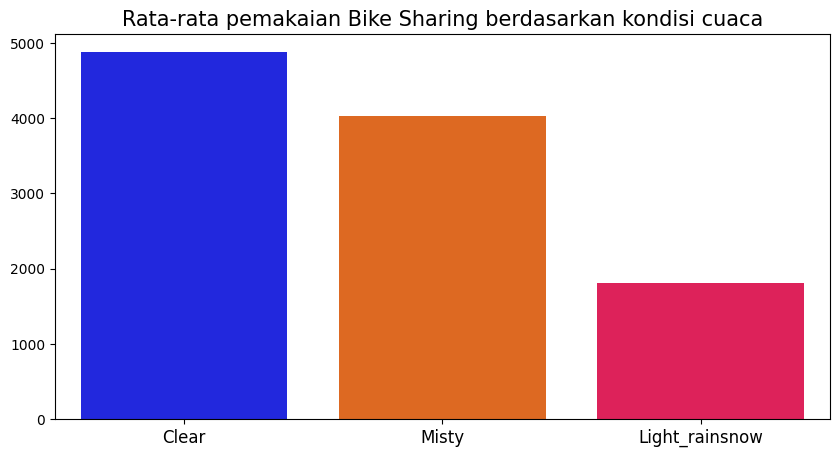

In [11]:
weather_df = day_df.groupby(by="weathersit").agg({
    "cnt": "mean"
})
weather_df.head()

weather_df.rename(columns={
    "cnt": "bikers_count"
}, inplace=True)

colors = ["#030bfc", "#fc6203", "#fc034e",]

plt.figure(figsize=(10, 5)) 
sns.barplot(
    y="bikers_count", 
    x="weathersit",
    legend='auto',
    hue='weathersit',
    data=weather_df.sort_values(by="bikers_count", ascending=False),
    palette=colors
)
plt.title("Rata-rata pemakaian Bike Sharing berdasarkan kondisi cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


### Pertanyaan 2: Kapan pemakaian Sepeda paling banyak dipakai berdasarkan bulan kalender?

[Text(0.5, 0, 'Bulan'),
 Text(0, 0.5, 'Jumlah Pengguna'),
 Text(0.5, 1.0, 'Jumlah pengguna Bike Sharing per bulan')]

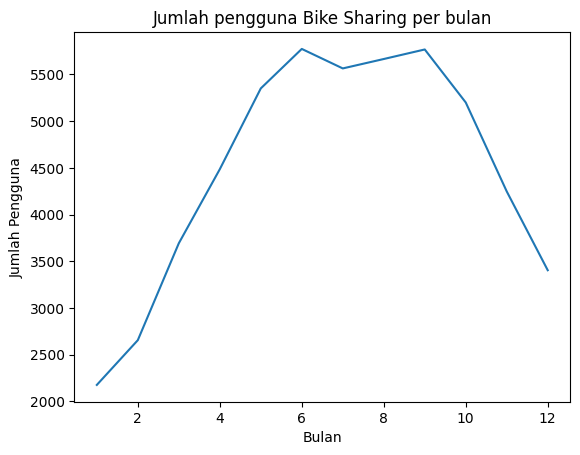

In [12]:
month_df = day_df.groupby(by=["mnth"]).agg({
    "instant": "nunique",
    "temp": "mean", 
    "windspeed": "mean",
    "cnt": "mean",
}).sort_values(by="mnth", ascending=True)

sns.lineplot(x = "mnth", y = "cnt", data = weather_df).set(xlabel ="Bulan", ylabel = "Jumlah Pengguna", title ='Jumlah pengguna Bike Sharing per bulan')


### Pertanyaan 3: Jenis pengguna manakah yang paling banyak memakai Bike Sharing di setiap musimnya?

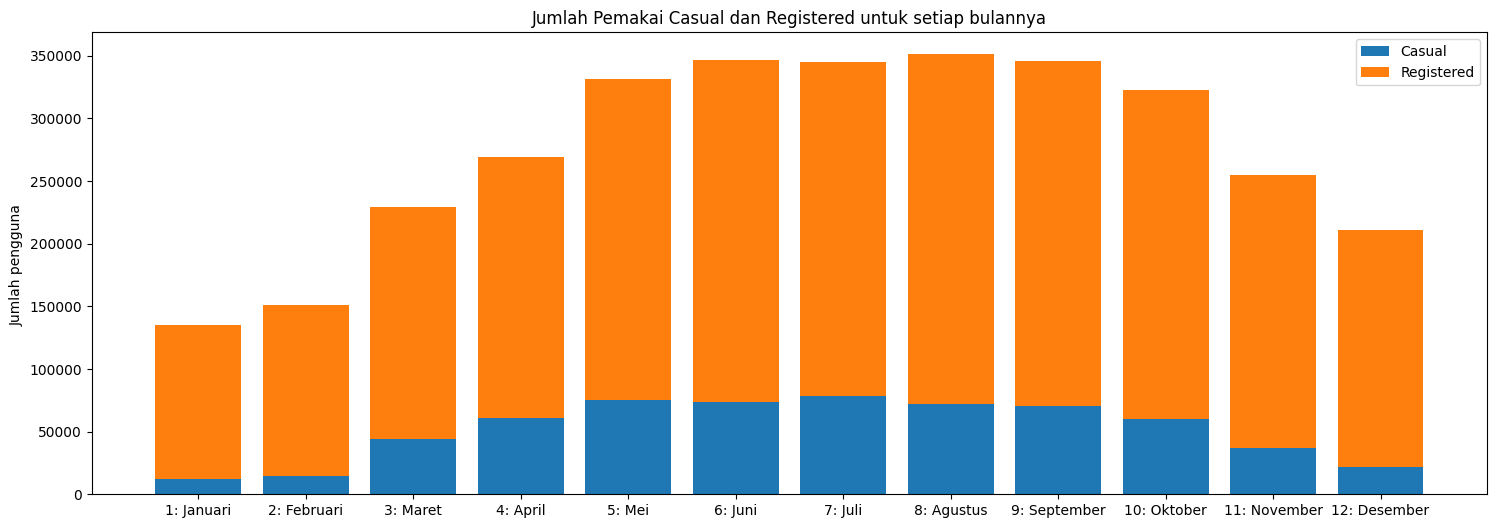

In [30]:
#Menghitung jumlah pengguna Casual atau Registered untuk setiap bulan
plt.figure(figsize=(18,6)) 
p1 = plt.bar(day_df['mnth'].unique(), day_df.groupby(['mnth'])['casual'].sum()) 
p2 = plt.bar(day_df['mnth'].unique(), day_df.groupby(['mnth'])['registered'].sum(), bottom = day_df.groupby(['mnth'])['casual'].sum()) 

#Menambahkan chart legend sehingga lebih mudah dipahami 
plt.ylabel('Jumlah pengguna ')
plt.title("Jumlah Pemakai Casual dan Registered untuk setiap bulannya")
plt.xticks(day_df['mnth'].unique(), ('1: Januari', '2: Februari', '3: Maret', '4: April', '5: Mei', '6: Juni', '7: Juli', '8: Agustus', '9: September', '10: Oktober', '11: November', '12: Desember')) 
plt.legend((p1[0], p2[0]), ('Casual', 'Registered')) 
plt.show()


## Conclusion

- Kesimpulan dari pertanyaan Apakah kondisi cuaca mempengaruhi jumlah pemakaian Bike Sharing? 
  Dapat kita simpulkan kondisi cuaca mempengaruhi pemakaian Bike Sharing, dimana pemakaian tertinggi pada saat cuaca Cerah. Perbedaan pada saat cuaca Cerah dan cuaca Berkabut tidak terlalu significant namun pada saat cuaca sedang Hujan Salju Ringan, pemakaiannya langsung menurun. Disini kita dapat menyimpulkan bahwa kondisi cuaca mempengaruhi pemakaian, dimana orang-orang lebih menyukai cuaca cerah.

- Kesimpulan dari pertanyaan Kapan pemakaian Sepeda paling banyak dipakai berdasarkan bulan kalender?
  Bulan Mei (5) hingga bulan September (9) menjadi bulan dimana pemakaian Bike Sharing paling banyak. Jumlah pemakaian menurun mulai bulan Oktober dan mulai meningkat lagi bulan Februari. 


- Kesimpulan dari pertanyaan Jenis pengguna manakah yang paling banyak memakai Bike Sharing di setiap musimnya?
  Dapat kita simpulkan jumlah pengguna Casual atau pengguna yang tidak terdaftar secara tetap di aplikasi Bike Sharing meningkat di bulan Maret dan mulai menurun di bulan Oktober. 